In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3),  # 多维正态分布的均值
                                 cov=1.5,  # 协方差矩阵
                                 n_samples=300,  # 样本数量
                                 n_features=2,  # 特征数量
                                 n_classes=2,  # 类别数量
                                 random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

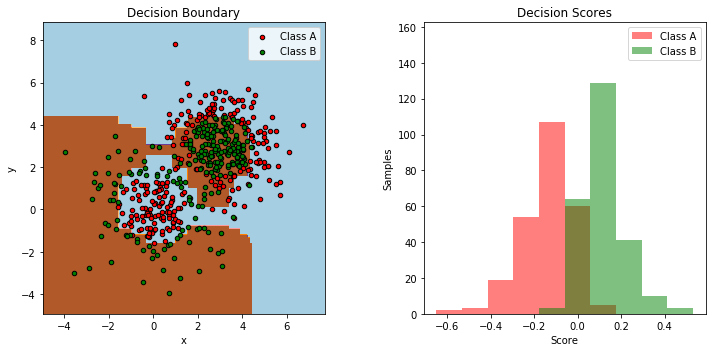

In [16]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "rg"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)  # 计算样本到分离超平面的有符号距离
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)  # 图形重叠部分颜色为深色
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [17]:
bdt.score(X, y)

0.886

In [21]:
bdt.estimator_weights_  # 每个基本分类器的权重(仅当algorithm="SAMME"有效)

array([0.38052616, 0.31598324, 0.38125112, 0.59435526, 0.63600229,
       0.50775684, 0.25482   , 0.38934943, 0.50712984, 0.56998512,
       0.4898713 , 0.2936982 , 0.34363339, 0.54930021, 0.38168037,
       0.3550652 , 0.35522041, 0.30123859, 0.26787616, 0.43585874,
       0.28935792, 0.41461673, 0.29005479, 0.15786977, 0.16840911,
       0.33340579, 0.4152961 , 0.46208242, 0.16568693, 0.17450113,
       0.16046754, 0.14852698, 0.27599515, 0.23548739, 0.21519765,
       0.20660689, 0.29202474, 0.39549225, 0.22304115, 0.19503284,
       0.18971314, 0.32736242, 0.23608531, 0.34089584, 0.1104996 ,
       0.10913084, 0.10347914, 0.09838445, 0.17592494, 0.16167029,
       0.15618552, 0.14944201, 0.14330425, 0.14009886, 0.13589666,
       0.13063905, 0.11799425, 0.22260013, 0.28726536, 0.124136  ,
       0.12626491, 0.12424742, 0.06101475, 0.06136867, 0.11553717,
       0.11067561, 0.10892547, 0.10791319, 0.10386079, 0.09990155,
       0.18644986, 0.27707232, 0.22611353, 0.29501301, 0.04266

In [22]:
bdt.estimator_errors_

array([0.406     , 0.42165497, 0.40582518, 0.35563618, 0.34615078,
       0.37571952, 0.43663749, 0.40387392, 0.3758666 , 0.36124026,
       0.37992389, 0.42709873, 0.41492715, 0.36602678, 0.40572168,
       0.41215466, 0.41211706, 0.42525473, 0.43342857, 0.39272819,
       0.42816107, 0.39780563, 0.42799045, 0.46061433, 0.45799695,
       0.41741217, 0.3976429 , 0.38649193, 0.45867277, 0.45648508,
       0.45996898, 0.46293637, 0.43143589, 0.44139871, 0.44640725,
       0.44853123, 0.42750825, 0.40239586, 0.44446973, 0.45139576,
       0.45271346, 0.41888253, 0.44125129, 0.41559188, 0.47240317,
       0.47274434, 0.47415328, 0.47542371, 0.45613185, 0.45967023,
       0.4610328 , 0.46270887, 0.46423512, 0.46503246, 0.46607803,
       0.46738661, 0.47053561, 0.44457863, 0.42867348, 0.46900579,
       0.46847564, 0.46897804, 0.48475104, 0.48466265, 0.4711478 ,
       0.47235931, 0.47279553, 0.47304785, 0.47405812, 0.47504536,
       0.4535221 , 0.43117168, 0.44371124, 0.42677704, 0.48933